## I.CODAGE/DECODAGE D'UN SEUL MOT
On veut coder le texte avec la clé 

In [0]:
!pip install numpy

    100% |████████████████████████████████| 17.3MB 869kB/s eta 0:00:01   15% |█████▏                          | 2.8MB 38.7MB/s eta 0:00:01


In [0]:
import numpy as np
texte="NEWYORK"
cle="CARACAS"




In [0]:
t=[]
for l in texte:
    t.append(ord(l))
t

[78, 69, 87, 89, 79, 82, 75]

à quoi correspondent ces nombres?

In [0]:
c=[]
for l in cle:
    c.append(ord(l))
c

[67, 65, 82, 65, 67, 65, 83]

et ceux ci?



In [0]:
m=[]
for i in range(len(c)):
    m.append(np.bitwise_xor(t[i], c[i]))
print(m)
messagecode=''
for nbre in m:
  messagecode=messagecode+chr(nbre)
messagecode 


[13, 4, 5, 24, 12, 19, 24]


'\r\x04\x05\x18\x0c\x13\x18'

que représentent les variables m et messagecode ?

In [0]:
d=[]
D=""
for i in range(len(c)):
    d.append(np.bitwise_xor(m[i], c[i]))
    D=D+chr(d[i])

print("message decode",D)

message decode NEWYORK


# II.Codage/Decodage d'un texte
On va créer une fonction qui va faire en plus condensé ce qui précède

In [0]:
def codage(texte,cle):
  t=[]
  for l in texte:
    t.append(ord(l))
  c=[]
  for l in cle:
    c.append(ord(l))
  m=[]
  for i in range(len(c)):
    m.append(np.bitwise_xor(t[i], c[i]))
  messagecode=''
  for nbre in m:
    messagecode=messagecode+chr(nbre) 
  return(messagecode)


codage('NEWYORK','CARACAS')


'\r\x04\x05\x18\x0c\x13\x18'

In [0]:
def DEcodage(messagecode,cle):
  t=[]
  for l in messagecode:
    t.append(ord(l))
  
  c=[]
  for l in cle:
    c.append(ord(l))
  m=[]
  for i in range(len(c)):
    m.append(np.bitwise_xor(t[i], c[i]))
  messagecode=''
  for nbre in m:
    messagecode=messagecode+chr(nbre) 
  return(messagecode)


DEcodage(codage('NEWYORK','CARACAS'),'CARACAS')


'NEWYORK'

ça marche, modifions un peu

In [0]:
codage('NEWYORK','CARACA')
DEcodage(codage('NEWYORK','CARACA'),'CARACA')

'NEWYOR'

quel est le problème?

In [0]:
cle=2*'CARACASS'
texte='NEWYORK IS MAGIC'
codage(texte,cle)
DEcodage(codage(texte,cle),cle)

'NEWYORK IS MAGIC'

qu'a-t-on fait?

On veut coder le texte suivant

In [0]:
texte='Une demande de la physique amene parfois la naissance de theories caillouteuses  le praticien est presse le mathematicien fignole ensuite son travail et la route raboteuse devient une belle autostrade sur laquelle le praticien roule sans difficultes  Le physicien taille son chemin a la serpe  a la pelle  a la pioche  Les mathematiciens trouvent le sentier interessant  lamenagent  Si le physicien a besoin que son chemin soit plus large ou aille plus loin  le mathematicien arrive avec son bulldozer  Puis il perfectionne  et ainsi de suite  Parfois même il trace une route qui traverse une region ou le physicien ne sent pas le besoin daller ; puis vient un temps ou le physicien eprouve le besoin de voir un peu de ce côte-la et il se rejouit de trouver la route prête   Raymond Queneau'
len(texte)

790

faites les modifications nécessaires sur la cle

In [0]:
cle=2*'CARACASS' #a modifier
codage(texte,cle)
DEcodage(codage(texte,cle),cle)

'Une demande de l'

# III.IMAGE XOR

In [0]:
!pip install opencv-python 
!pip install matplotlib


    100% |████████████████████████████████| 12.9MB 1.0MB/s eta 0:00:01   54% |█████████████████▌              | 7.0MB 50.9MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 24.3MB/s ta 0:00:01
    100% |████████████████████████████████| 952kB 11.8MB/s ta 0:00:01


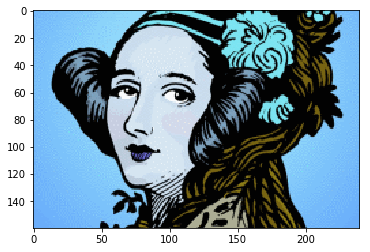

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv.imread('crypted.png')
img2 = cv.imread('key.png')
img1 = cv.bitwise_xor(img1,img2)

cv.imwrite("res.jpg",img1)
plt.imshow(img1)
plt.show()

